# Lab 1

# Step 1: Practice tensor manipulations and operations

In [71]:
# Scalars (rank-0 tensors)

import numpy as np
x = np.array(12)
x.ndim

0

In [70]:
# Vectors (rank-1 tensors)

x = np.array([12, 3, 6, 14, 7])
x.ndim

1

In [69]:
# Matrices (rank-2 tensors)

x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

In [72]:
# Rank-3 and higher-rank tensors

x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

In [73]:
# Some sample data to show functions

from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images.ndim

3

In [74]:
train_images.shape

(60000, 28, 28)

In [75]:
train_images.dtype

dtype('uint8')

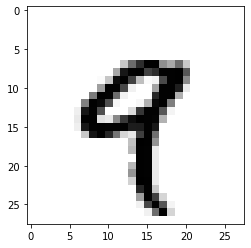

In [76]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [77]:
train_labels[4]

9

# Manipulating tensors in NumPy

In [78]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [79]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [80]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [81]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [82]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

In [84]:
batch = train_images[:128]
batch.shape

(128, 28, 28)

In [85]:
batch = train_images[128:256]
batch.shape

(128, 28, 28)

In [86]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]
batch.shape

(128, 28, 28)

# Compare two functions

In [89]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))
print(x)
print(x.shape)

[[0.51822292 0.77915732 0.77241561 ... 0.39741929 0.64792781 0.12163824]
 [0.45063008 0.43103785 0.71973505 ... 0.21065824 0.24268749 0.37872407]
 [0.55279345 0.33892383 0.63218393 ... 0.16451042 0.3086625  0.28276092]
 ...
 [0.7182784  0.91443873 0.64223105 ... 0.49008697 0.70906909 0.20705199]
 [0.46044295 0.49459139 0.06519439 ... 0.39049176 0.36709822 0.48349021]
 [0.50804531 0.24398121 0.60075327 ... 0.84268474 0.853074   0.5645927 ]]
(20, 100)


In [90]:
t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [91]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.88 s


In [112]:
# Broadcasting
import numpy as np
x = np.random.random((32, 10))
y = np.random.random((10,))
print(x)
print(x.shape)

[[0.77006727 0.93646838 0.83165224 0.08807463 0.30874609 0.17665623
  0.57192232 0.25881636 0.21054363 0.90029321]
 [0.61934868 0.73019893 0.90421875 0.03624559 0.8460316  0.16411061
  0.38064794 0.72727479 0.24821153 0.64634798]
 [0.4153669  0.9331672  0.64559174 0.36497412 0.73401123 0.71743325
  0.76623347 0.05736646 0.56721892 0.58203647]
 [0.08521796 0.41776934 0.49681967 0.45625966 0.15423877 0.55335489
  0.18125055 0.08950058 0.2332953  0.15733002]
 [0.91108509 0.56537361 0.56158615 0.61794959 0.51515262 0.34118766
  0.41678306 0.05918565 0.41925376 0.13582086]
 [0.80282295 0.28472376 0.50886468 0.66899247 0.59041518 0.17762131
  0.31515772 0.07752864 0.43668058 0.10447511]
 [0.19325468 0.26338911 0.96456563 0.61043157 0.7601784  0.50460606
  0.71333245 0.72476695 0.10630061 0.99330418]
 [0.05157764 0.90722049 0.35111109 0.80361187 0.32305851 0.90912305
  0.41111823 0.00530575 0.2027704  0.955051  ]
 [0.34789155 0.51046663 0.21321832 0.13963736 0.14209952 0.42910697
  0.7651651 

In [98]:
# expanding dimensions

print(y.shape)
print(y)
y_exp = np.expand_dims(y, axis=0)
print(y_exp.shape)
print(y_exp)

(10,)
[0.2079807  0.05735078 0.95703648 0.73330721 0.63584664 0.18962574
 0.30955167 0.34524097 0.95071471 0.05250158]
(1, 10)
[[0.2079807  0.05735078 0.95703648 0.73330721 0.63584664 0.18962574
  0.30955167 0.34524097 0.95071471 0.05250158]]


In [100]:
Y = np.concatenate([y] * 32, axis=0)
print(Y.shape)
print(Y)

(320,)
[0.2079807  0.05735078 0.95703648 0.73330721 0.63584664 0.18962574
 0.30955167 0.34524097 0.95071471 0.05250158 0.2079807  0.05735078
 0.95703648 0.73330721 0.63584664 0.18962574 0.30955167 0.34524097
 0.95071471 0.05250158 0.2079807  0.05735078 0.95703648 0.73330721
 0.63584664 0.18962574 0.30955167 0.34524097 0.95071471 0.05250158
 0.2079807  0.05735078 0.95703648 0.73330721 0.63584664 0.18962574
 0.30955167 0.34524097 0.95071471 0.05250158 0.2079807  0.05735078
 0.95703648 0.73330721 0.63584664 0.18962574 0.30955167 0.34524097
 0.95071471 0.05250158 0.2079807  0.05735078 0.95703648 0.73330721
 0.63584664 0.18962574 0.30955167 0.34524097 0.95071471 0.05250158
 0.2079807  0.05735078 0.95703648 0.73330721 0.63584664 0.18962574
 0.30955167 0.34524097 0.95071471 0.05250158 0.2079807  0.05735078
 0.95703648 0.73330721 0.63584664 0.18962574 0.30955167 0.34524097
 0.95071471 0.05250158 0.2079807  0.05735078 0.95703648 0.73330721
 0.63584664 0.18962574 0.30955167 0.34524097 0.95071471

In [102]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
print(x.shape)
y = np.random.random((32, 10))
print(y.shape)
z = np.maximum(x, y)
print(z.shape)

(64, 3, 32, 10)
(32, 10)
(64, 3, 32, 10)


In [106]:
# Tensor product
x = np.random.random((32,))
print(x)
y = np.random.random((32,))
print(y)
z = np.dot(x, y)
print(z)

[0.10599001 0.4170651  0.38780779 0.49462969 0.24069958 0.54647442
 0.53808436 0.00582088 0.23660663 0.34585928 0.21517064 0.63680532
 0.80905059 0.82850867 0.09171112 0.96919216 0.282069   0.70735341
 0.46011082 0.24178662 0.43621529 0.03100754 0.85941265 0.81090665
 0.90091622 0.86627293 0.46970933 0.31670228 0.88105047 0.58197607
 0.05666898 0.77412989]
[0.80975184 0.29034148 0.22272327 0.0545495  0.25989552 0.44553877
 0.20456263 0.05308595 0.97332134 0.08187058 0.2093653  0.73838124
 0.16567664 0.66586717 0.87998006 0.39973224 0.57300129 0.17406076
 0.29709211 0.49583275 0.84456428 0.46498827 0.38954026 0.47176706
 0.68621977 0.71325654 0.99707386 0.22124743 0.96785255 0.42068986
 0.68460948 0.70768713]
7.764585250825816


In [109]:
# Reshaping

train_images = train_images.reshape((60000, 28 * 28))

x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [110]:
x = x.reshape((6, 1))
x.shape

(6, 1)

In [111]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

# Step 2: Build blocks of neural networks using Keras.

In [59]:
from tensorflow import keras

In [60]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [61]:
model = keras.Sequential([
    layers.Dense(10, activation="relu", input_shape=train_images.shape),
    layers.Dense(2, activation="sigmoid")
])

In [62]:
model.compile()

In [63]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 60000, 28, 10)     290       
                                                                 
 dense_18 (Dense)            (None, 60000, 28, 2)      22        
                                                                 
Total params: 312
Trainable params: 312
Non-trainable params: 0
_________________________________________________________________


# Step 3: Build and train a fully connected network for classification using MNIST and IMDB data.

(preprocessing, building, configuring, training and plotting results and indicators).

# MNIST

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
# Preprocessing
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [10]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [11]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2526 - accuracy: 0.9265 - val_loss: 0.1327 - val_accuracy: 0.9594
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1032 - accuracy: 0.9693 - val_loss: 0.0935 - val_accuracy: 0.9710
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0685 - accuracy: 0.9794 - val_loss: 0.0758 - val_accuracy: 0.9770
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0491 - accuracy: 0.9853 - val_loss: 0.0793 - val_accuracy: 0.9759
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0370 - accuracy: 0.9888 - val_loss: 0.0670 - val_accuracy: 0.9795


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

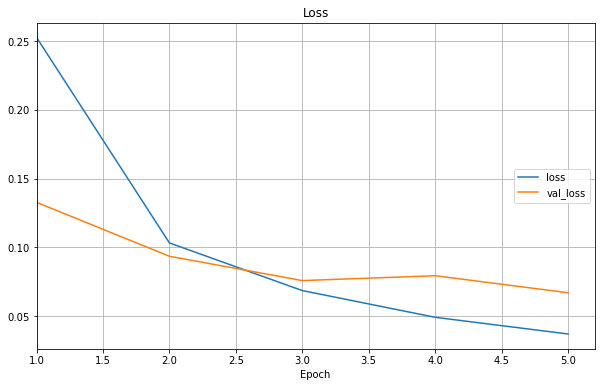

In [13]:
history_df = pd.DataFrame(history.history)
history_df.index += 1

cols = ['loss', 'val_loss']

plt.figure(figsize=(10, 6))
plt.plot(history_df[cols])
plt.grid(True)
plt.xlabel('Epoch')
plt.gca().set_xlim(left=1)
plt.title("Loss")
plt.legend(cols, loc="right")
plt.show()

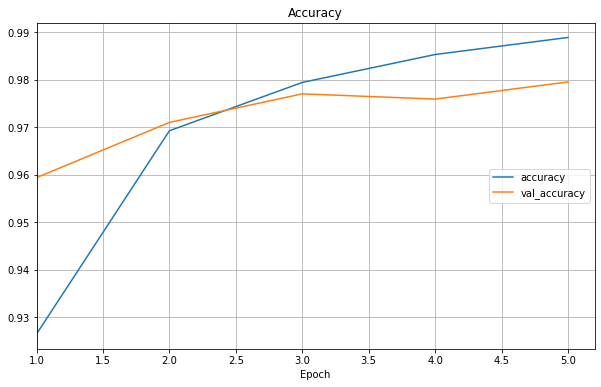

In [14]:
cols = ['accuracy', 'val_accuracy']

plt.figure(figsize=(10, 6))
plt.plot(history_df[cols])
plt.grid(True)
plt.xlabel('Epoch')
plt.gca().set_xlim(left=1)
plt.title("Accuracy")
plt.legend(cols, loc="right")
plt.show()

In [15]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 88ms/step


array([1.6637230e-10, 3.8477785e-10, 6.0796317e-08, 1.8144761e-04,
       3.5840176e-12, 1.1653704e-08, 8.2314077e-15, 9.9981815e-01,
       4.0717573e-08, 3.5218858e-07], dtype=float32)

In [16]:
predictions[0].argmax()

7

In [17]:
predictions[0][7]

0.99981815

In [18]:
test_labels[0]

7

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0670 - accuracy: 0.9795
test_acc: 0.9794999957084656


# IMDB

In [20]:
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.datasets import imdb
import numpy as np

In [21]:
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)

In [22]:
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

In [23]:
def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [24]:
data = vectorize(data)

In [25]:
targets = np.array(targets).astype("float32")
test_x = data[:10000]
test_y = targets[:10000]
train_x = data[10000:]
train_y = targets[10000:]

In [38]:
model = models.Sequential()
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [39]:
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [40]:
history = model.fit(
 train_x, train_y,
 epochs= 5
)


Epoch 1/5
1250/1250 [==============================] - 8s 6ms/step - loss: 0.3232 - accuracy: 0.8624
Epoch 2/5
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2020 - accuracy: 0.9198
Epoch 3/5
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1459 - accuracy: 0.9443
Epoch 4/5
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1039 - accuracy: 0.9621
Epoch 5/5
1250/1250 [==============================] - 7s 5ms/step - loss: 0.0794 - accuracy: 0.9707


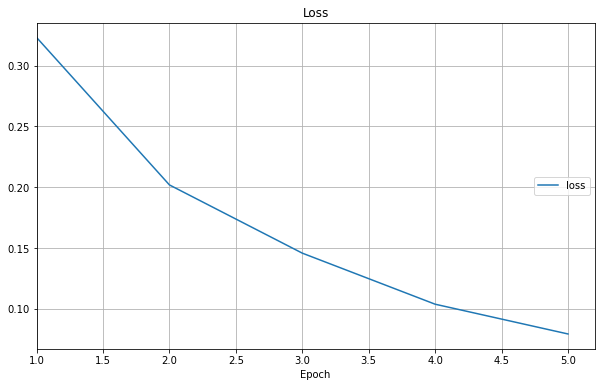

In [42]:
history_df = pd.DataFrame(history.history)
history_df.index += 1

cols = ['loss']

plt.figure(figsize=(10, 6))
plt.plot(history_df[cols])
plt.grid(True)
plt.xlabel('Epoch')
plt.gca().set_xlim(left=1)
plt.title("Loss")
plt.legend(cols, loc="right")
plt.show()

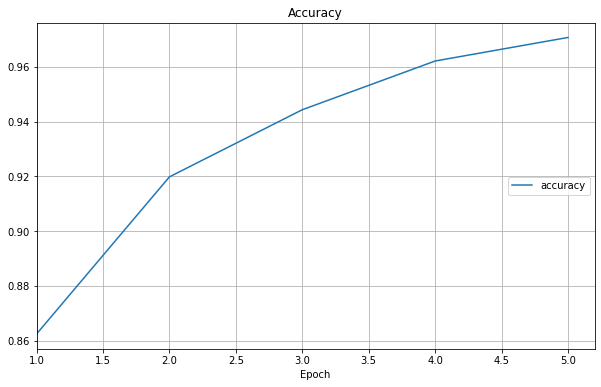

In [43]:
cols = ['accuracy']

plt.figure(figsize=(10, 6))
plt.plot(history_df[cols])
plt.grid(True)
plt.xlabel('Epoch')
plt.gca().set_xlim(left=1)
plt.title("Accuracy")
plt.legend(cols, loc="right")
plt.show()

In [44]:
test_loss, test_acc = model.evaluate(test_x, test_y)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.3639 - accuracy: 0.8834
test_acc: 0.883400022983551
